# Regression Case Study

**PROBLEM STATEMENT** 
There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

- The one major factor that holds anyone back while buying a used car is the price(target variable).You will be predicting the Price of used cars with the data collected from various sources and distributed across various locations in India.
- Compare different models and find out which one is the most suitable in this case in predicting the prices.

**Data Dictionary**

1. **Name:** The brand and model of the car.
2. **Location:** The location in which the car is being sold or is available for purchase.
3. **Year:** The year or edition of the model.
4. **Kilometers_Driven:** The total kilometers driven in the car by the previous owner(s) in KM.
5. **Fuel_Type:** The type of fuel used by the car.
6. **Transmission:** The type of transmission used by the car.
7. **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.
8. **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
9. **Engine:** The displacement volume of the engine in cc.
10. **Power:** The maximum power of the engine in bhp.
11. **Seats:** The number of seats in the car.
12. **New_Price:** The price of a new car of the same model.
13. **Price:** The price of the used car in INR Lakhs.



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

**Read the data**

In [33]:
cars=pd.read_csv('Cars.csv')

**Check the Head**

In [34]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [35]:
#cars =cars[cars['Year'] >= 2000] - remove older data if resale of vehicles of tht year not allowed anymore

**Get the info**

In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


**Get the Summary Statistics**

In [37]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5961,212,Maruti Swift,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5950,11,Mumbai,781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5959.0,NaN,NaN,NaN,2013.389159,3.243051,1998.0,2011.5,2014.0,2016.0,2019.0
Kilometers_Driven,5953.0,NaN,NaN,NaN,58711.100118,91712.207172,171.0,33931.0,53000.0,73000.0,6500000.0
Fuel_Type,5961,5,Diesel,3188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5934,2,Manual,4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5946,4,First,4875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5959,439,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5944,143,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,5929,369,74 bhp,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check for Null Values**

In [38]:
cars.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

**% Null values**

In [39]:
cars.isnull().sum()/cars.isnull().sum().sum()*100

Name                  0.000000
Location              0.208808
Year                  0.037965
Kilometers_Driven     0.151860
Fuel_Type             0.000000
Transmission          0.512528
Owner_Type            0.284738
Mileage               0.037965
Engine                0.322703
Power                 0.607441
Colour                0.208808
Seats                 0.094913
No. of Doors          0.018983
New_Price            97.513288
Price                 0.000000
dtype: float64

**Since New_Price has over 97% Null values, we would drop this column for now**

In [40]:
cars=cars.drop('New_Price',axis=1)

In [41]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40


**Check for Duplicates**

In [42]:
cars.duplicated().sum()

2

In [43]:
cars.drop_duplicates(inplace=True)

**Check for Object Data Type**

In [44]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White
4,Toyota Innova,Delhi,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others


- It seems that the columns Mileage, Engine , Power needs to be cleaned and converted to Float/int dtype

In [45]:
cars['Mileage'] = cars['Mileage'].str.replace(',','').str.replace('kmpl','').str.replace('km/kg','').astype('float')

In [46]:
cars['Engine'] = cars['Engine'].str.replace(',','').str.replace('CC','').astype('float')

In [47]:
cars['Power'] = cars['Power'].replace('null bhp', 0)
cars['Power'] = cars['Power'].str.replace(',','').str.replace('bhp','').astype('float')

In [48]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,White
4,Toyota Innova,Delhi,Diesel,Manual,First,Others


**Create a new column 'Brand' which has the brand name of the Cars**

In [49]:
cars['Brand']=cars.Name.apply(lambda x:x.split(' ')[0])

In [50]:
len(cars.Brand.unique())

30

- Brand Isuzu is available twice in different cases ('ISUZU', 'Isuzu'). To avoid this being considered as 2 different brands, correct to single format

In [51]:
cars['Brand'] = cars['Brand'].str.replace('ISUZU', 'Isuzu')

**Create a new column 'Model' which has the Model name of the Cars**

In [52]:
cars['Model']=cars.Name.apply(lambda x: ' '.join(x.split(' ')[1:]))

In [53]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

1                     3
1000                  1
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               106
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia           

- Model Ecosport is available twice in different cases ('Ecosport', 'EcoSport'). To avoid this being considered as 2 different models, correct to single format.

### Univariate Analysis
Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [54]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(cars[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(cars[column].skew(),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    sns.histplot(cars[column], kde=True, color='c', ax=axs[0])
    sns.boxplot(x=cars[column], ax=axs[1],color='r')

Description of Year
----------------------------------------------------------------------------
count    5957.000000
mean     2013.389794
std         3.242362
min      1998.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

 Skewness of Year
----------------------------------------------------------------------------
-0.8361851173142357

 Histogram and Boxplot of Year
----------------------------------------------------------------------------
None
Description of Kilometers_Driven
----------------------------------------------------------------------------
count    5.951000e+03
mean     5.871719e+04
std      9.172677e+04
min      1.710000e+02
25%      3.396550e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

 Skewness of Kilometers_Driven
----------------------------------------------------------------------------
58.51083928471081

 Histogram and Boxplot o

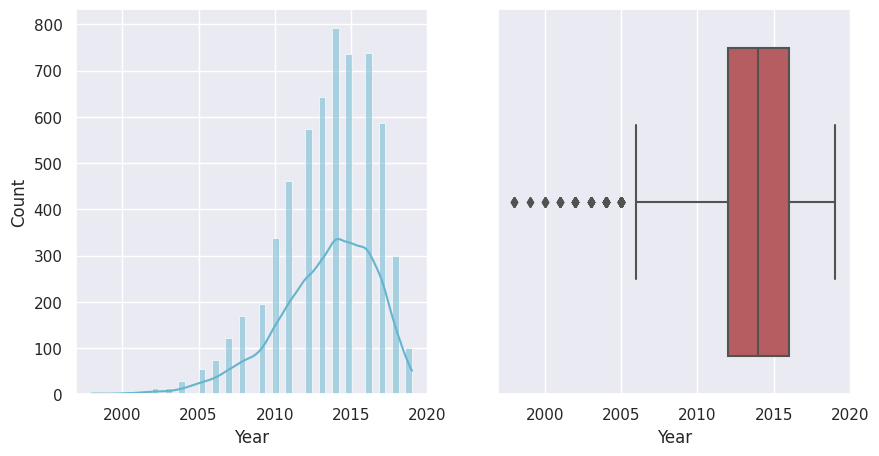

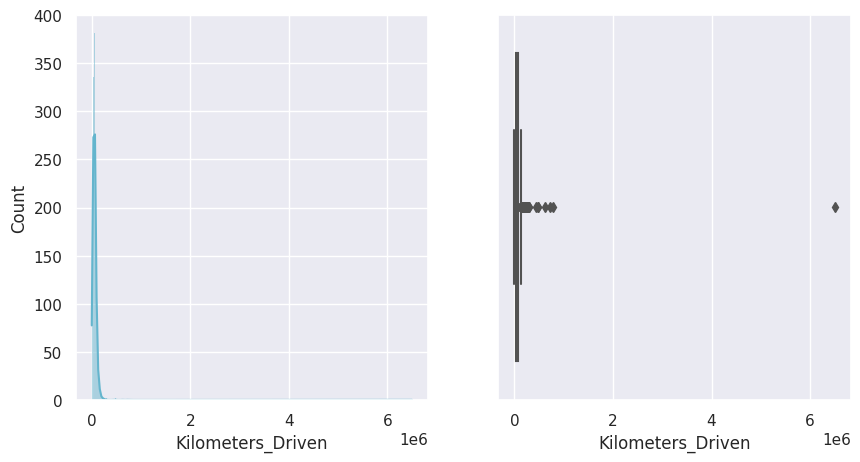

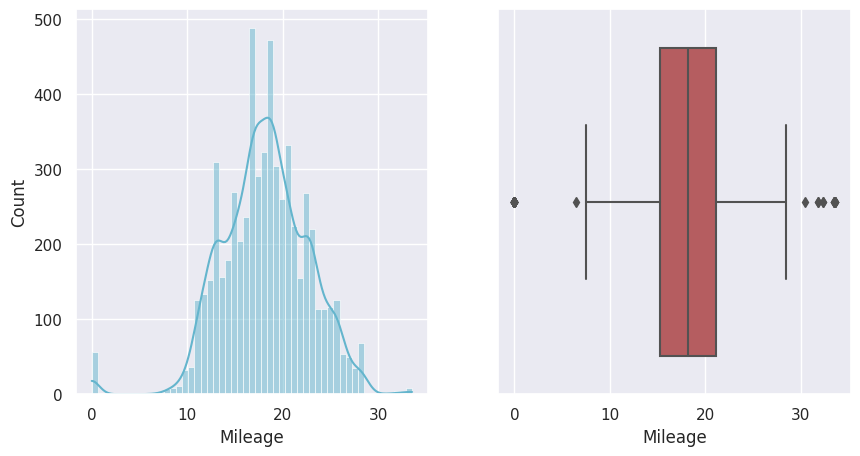

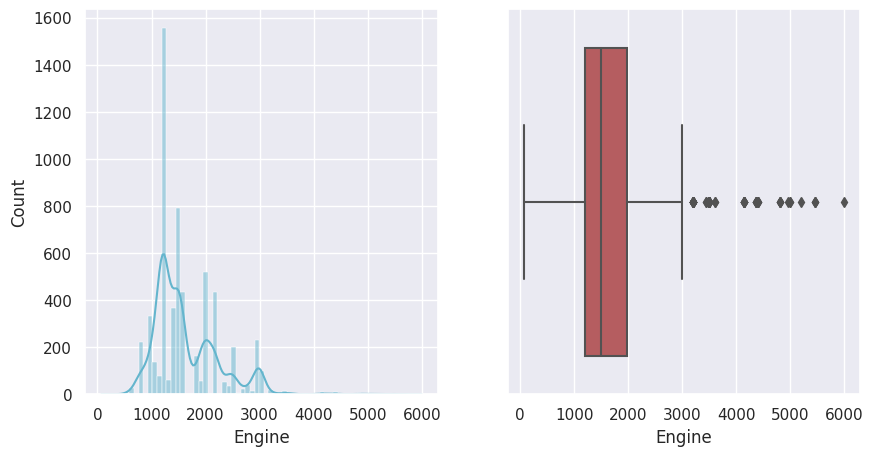

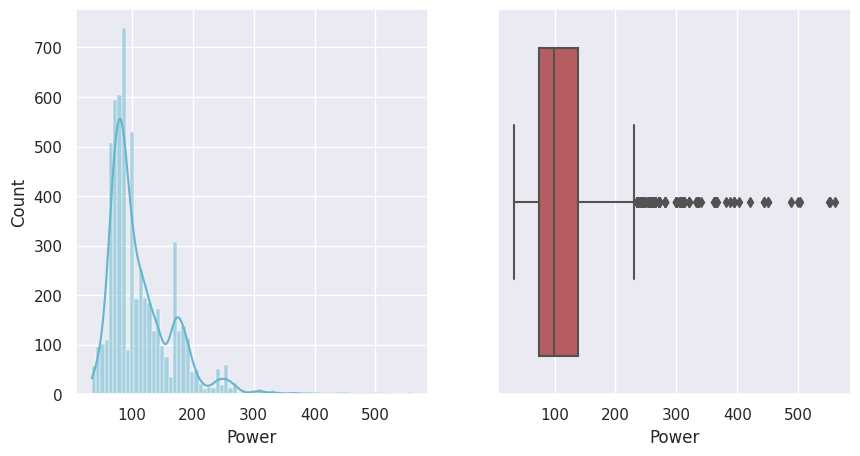

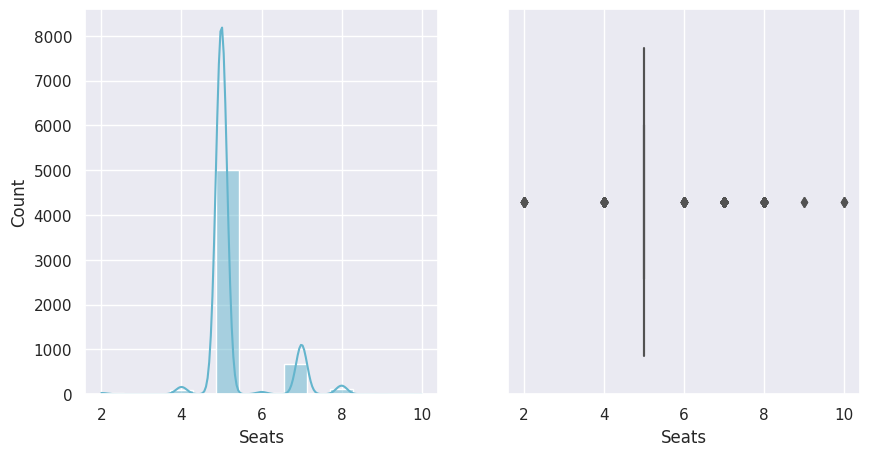

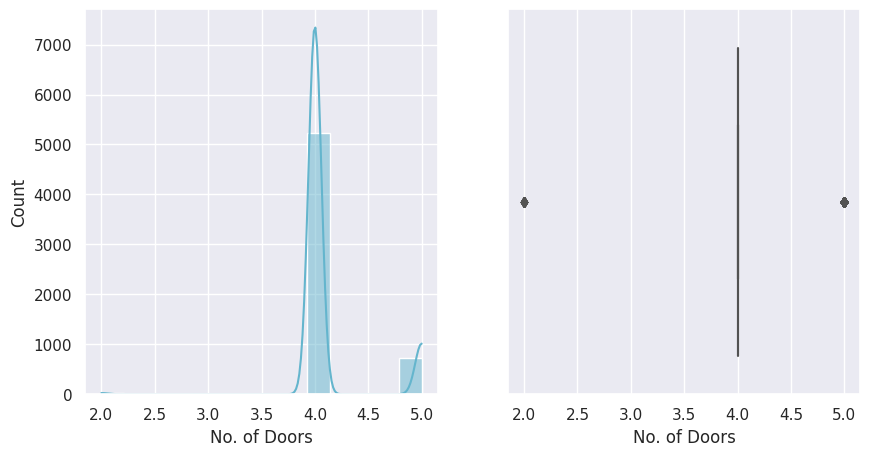

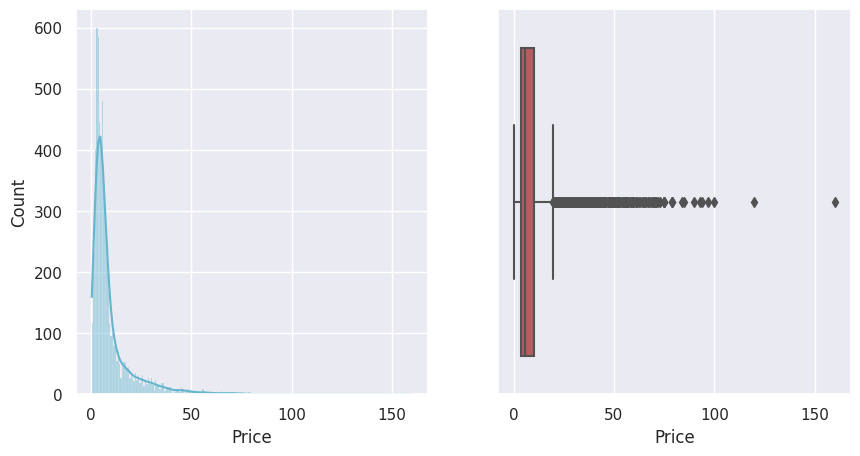

In [55]:
for column in cars.columns:
    if cars[column].dtype != 'object':
        print(univariateAnalysis_numeric(column,30))

In [56]:
cars['Model'] = cars['Model'].str.replace('EcoSport', 'Ecosport')

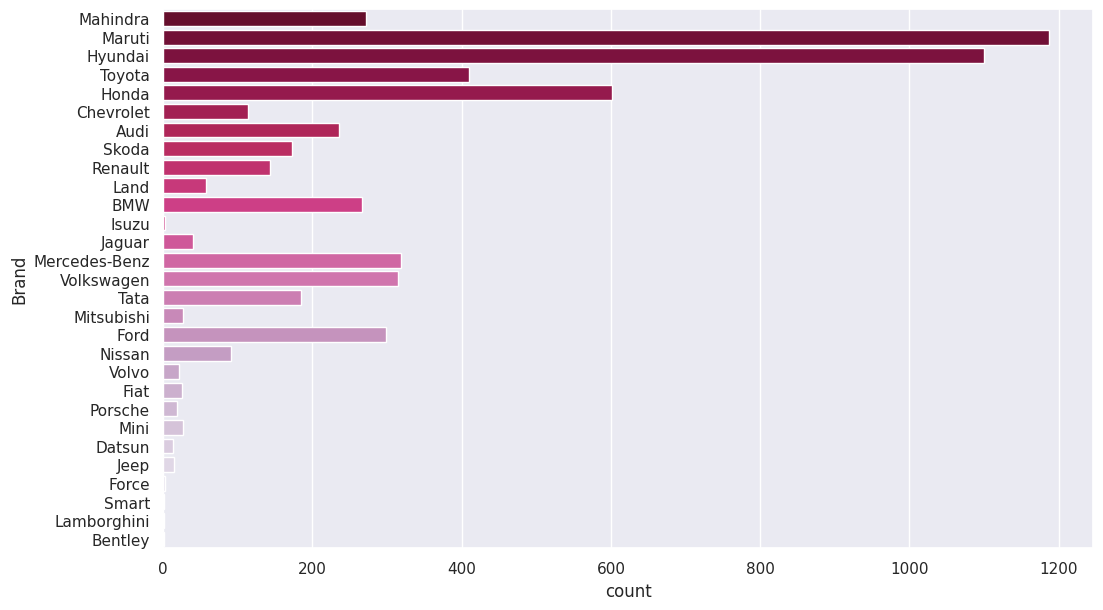

In [57]:
plt.figure(figsize=(12,7))
sns.countplot(y=(cars.Brand),palette='PuRd_r');

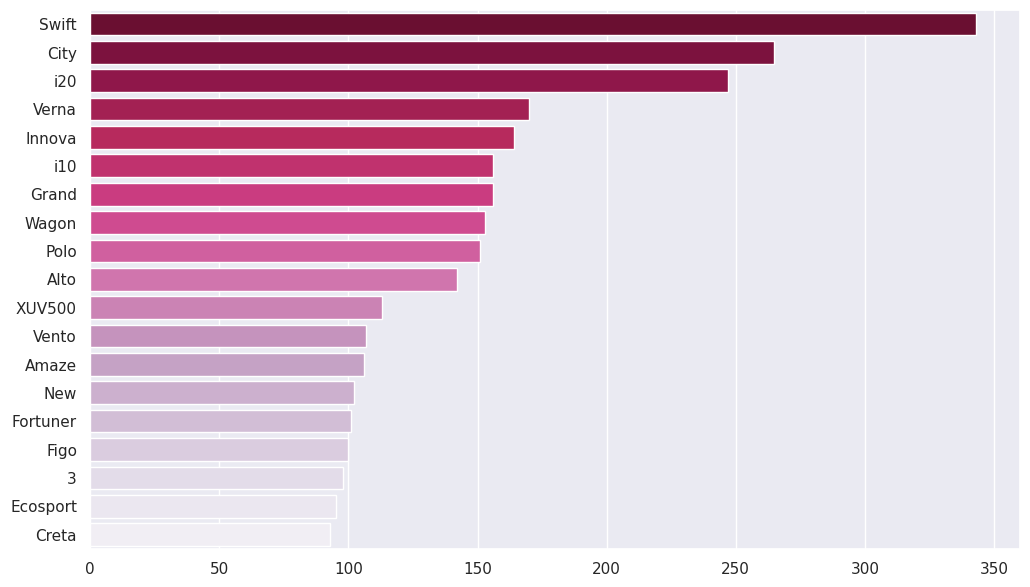

In [58]:
plt.figure(figsize=(12,7))
sns.barplot(y=cars.Model.value_counts()[cars.Model.value_counts()>90].index,
            x=cars.Model.value_counts()[cars.Model.value_counts()>90].values,palette='PuRd_r');

- There is a car by the Model name 'New', let's check which car is it
- There is a car by the Model name '3', let's check which car is it


In [59]:
cars[cars['Model']=='New'].head(2) # so it is a Mercedes Benz

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
71,Mercedes-Benz New,Hyderabad,2012.0,86000.0,Diesel,Automatic,First,14.84,2143.0,170.0,White,5.0,4.0,19.0,Mercedes-Benz,New
279,Mercedes-Benz New,Jaipur,2009.0,116000.0,Diesel,Manual,Second,15.80,2148.0,170.0,White,5.0,4.0,8.5,Mercedes-Benz,New


In [60]:
cars[cars['Model']=='3'].head(2) # so it is a BMW

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
22,BMW 3,Mumbai,2014.0,48000.0,Diesel,Automatic,First,21.76,1995.0,190.0,Others,5.0,4.0,26.5,BMW,3
35,BMW 3,Chennai,2009.0,137000.0,Diesel,Automatic,Second,13.20,1995.0,170.0,Others,5.0,4.0,9.0,BMW,3


**Bin the cars as per average Price of the Brand**
- 'Budget_Friendly'
- 'Medium_Range'
- 'TopNotch_Cars'

In [61]:
cars.Price.describe()

count    5959.000000
mean        9.529916
std        11.215743
min         0.440000
25%         3.500000
50%         5.660000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [62]:
#Binning the Car Companies based on avg prices of each car Company.
cars['Price'] = cars['Price'].astype('int')
cars_2 = cars.copy()
t = cars_2.groupby(['Brand'])['Price'].mean()
t

Brand
Audi              25.131356
BMW               24.823970
Bentley           59.000000
Chevrolet          2.451327
Datsun             2.538462
Fiat               2.800000
Force              9.333333
Ford               6.429530
Honda              4.935108
Hyundai            4.861818
Isuzu             14.666667
Jaguar            37.300000
Jeep              18.333333
Lamborghini      120.000000
Land              39.456140
Mahindra           7.610294
Maruti             4.058972
Mercedes-Benz     26.433962
Mini              26.538462
Mitsubishi        10.629630
Nissan             4.274725
Porsche           48.055556
Renault            5.307692
Skoda              7.075145
Smart              3.000000
Tata               3.065217
Toyota            11.131707
Volkswagen         4.790476
Volvo             18.523810
Name: Price, dtype: float64

In [63]:
cars_2 = cars_2.merge(t.reset_index(), how='left',on='Brand')
bins = [0,10,20,160]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
cars['Cars_Category'] = pd.cut(cars_2['Price_y'],bins,right=False,labels=label)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6,Mahindra,Scorpio,Budget_Friendly
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8,Maruti,Baleno,Budget_Friendly
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4,Mahindra,Xylo,Budget_Friendly
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3,Hyundai,Grand,Budget_Friendly
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6,Toyota,Innova,Medium_Range


In [64]:
cars.Cars_Category.value_counts()

Budget_Friendly    4518
TopNotch_Cars       964
Medium_Range        475
Name: Cars_Category, dtype: int64

In [65]:
cars.groupby(['Brand']).Cars_Category.value_counts()

Brand          Cars_Category  
Audi           TopNotch_Cars       224
               Budget_Friendly      11
               Medium_Range          1
BMW            TopNotch_Cars       255
               Budget_Friendly       9
               Medium_Range          3
Bentley        TopNotch_Cars         1
               Budget_Friendly       0
               Medium_Range          0
Chevrolet      Budget_Friendly     109
               Medium_Range          3
               TopNotch_Cars         1
Datsun         Budget_Friendly      12
               TopNotch_Cars         1
               Medium_Range          0
Fiat           Budget_Friendly      24
               TopNotch_Cars         1
               Medium_Range          0
Force          Budget_Friendly       3
               Medium_Range          0
               TopNotch_Cars         0
Ford           Budget_Friendly     294
               TopNotch_Cars         3
               Medium_Range          1
Honda          Budget_Friendly   

**Create a new column 'CarAge'**

Hint: Subtract Year by current year

In [66]:
import datetime
now = datetime.datetime.now()
now.year
cars['CarAge']= now.year-cars.Year

In [67]:
cars.CarAge.value_counts().sort_index(ascending=True)

4.0     101
5.0     298
6.0     586
7.0     739
8.0     736
9.0     793
10.0    642
11.0    573
12.0    461
13.0    338
14.0    196
15.0    170
16.0    122
17.0     75
18.0     55
19.0     28
20.0     13
21.0     14
22.0      7
23.0      4
24.0      2
25.0      4
Name: CarAge, dtype: int64

##  Bivariate Analysis w.r.t Target Variable

Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


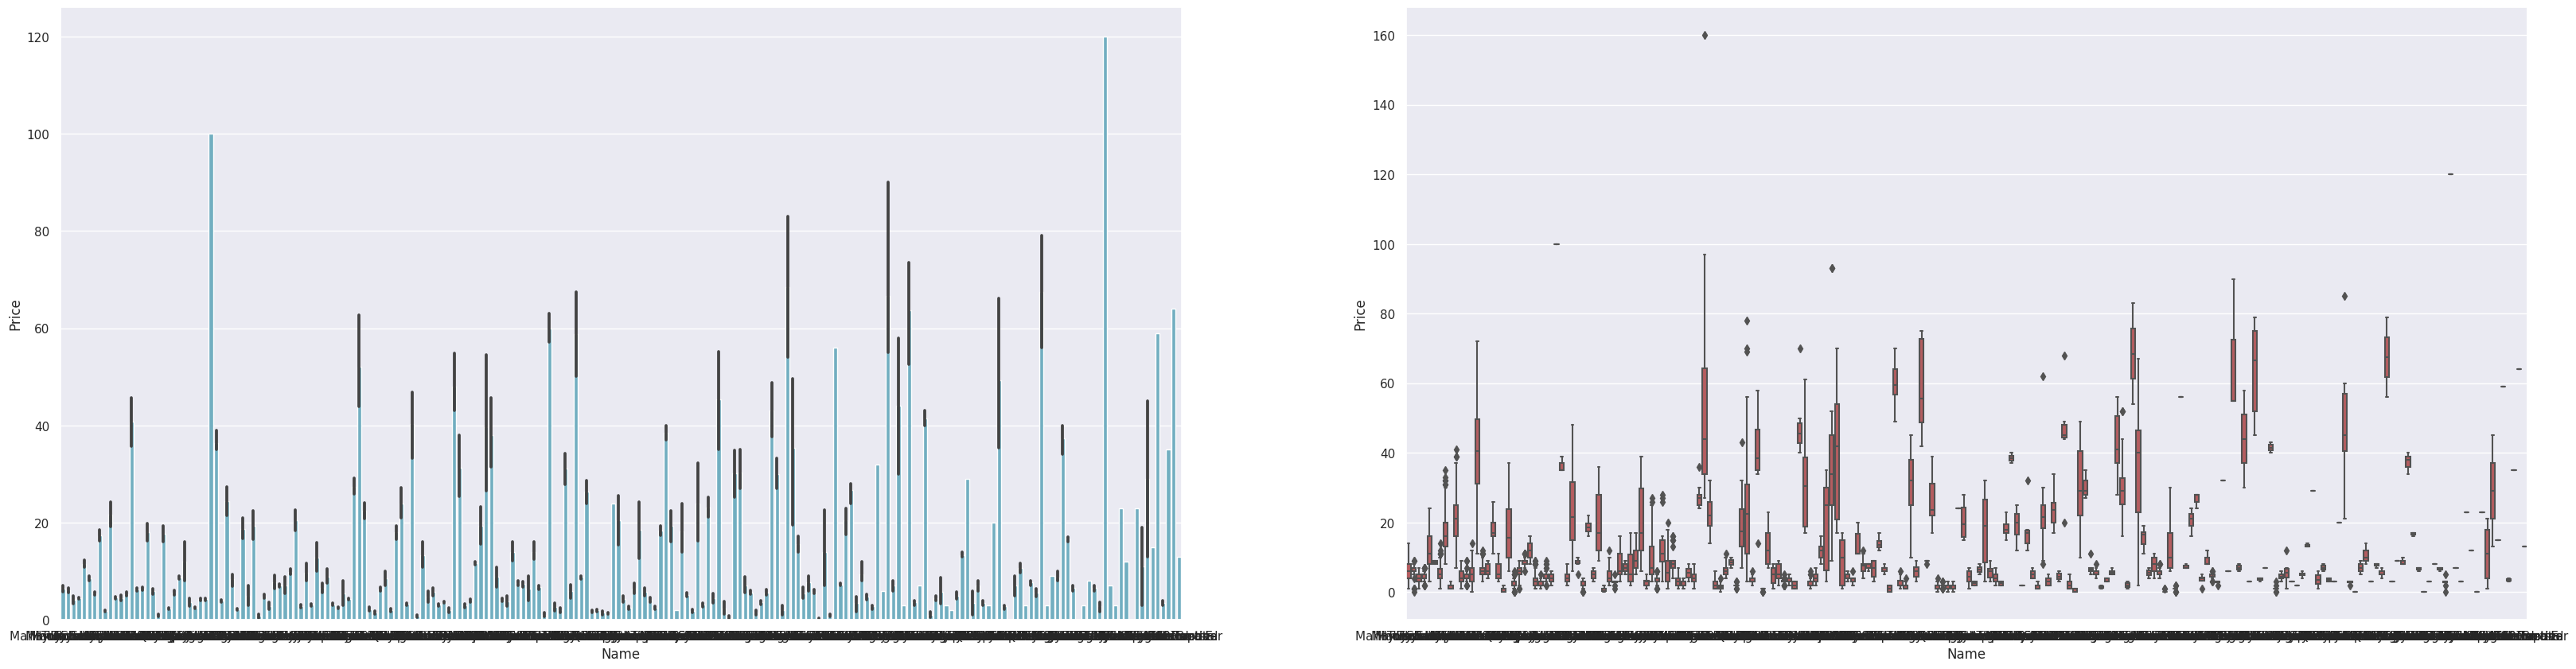

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


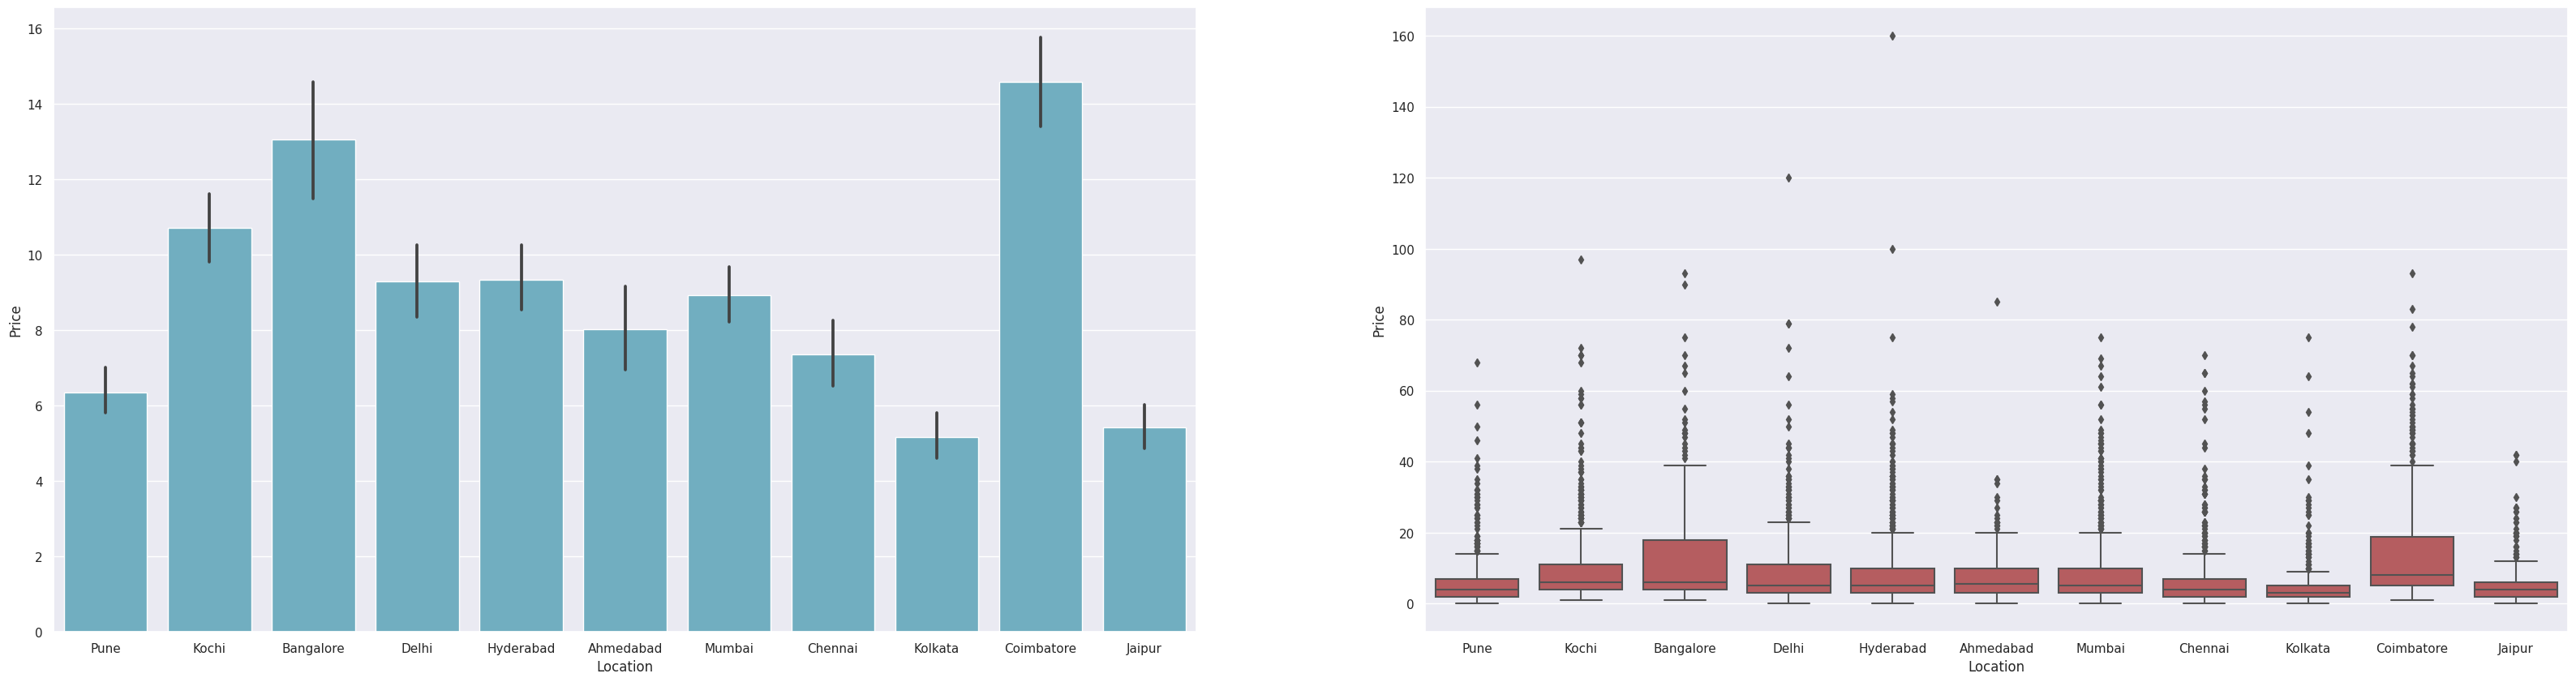

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


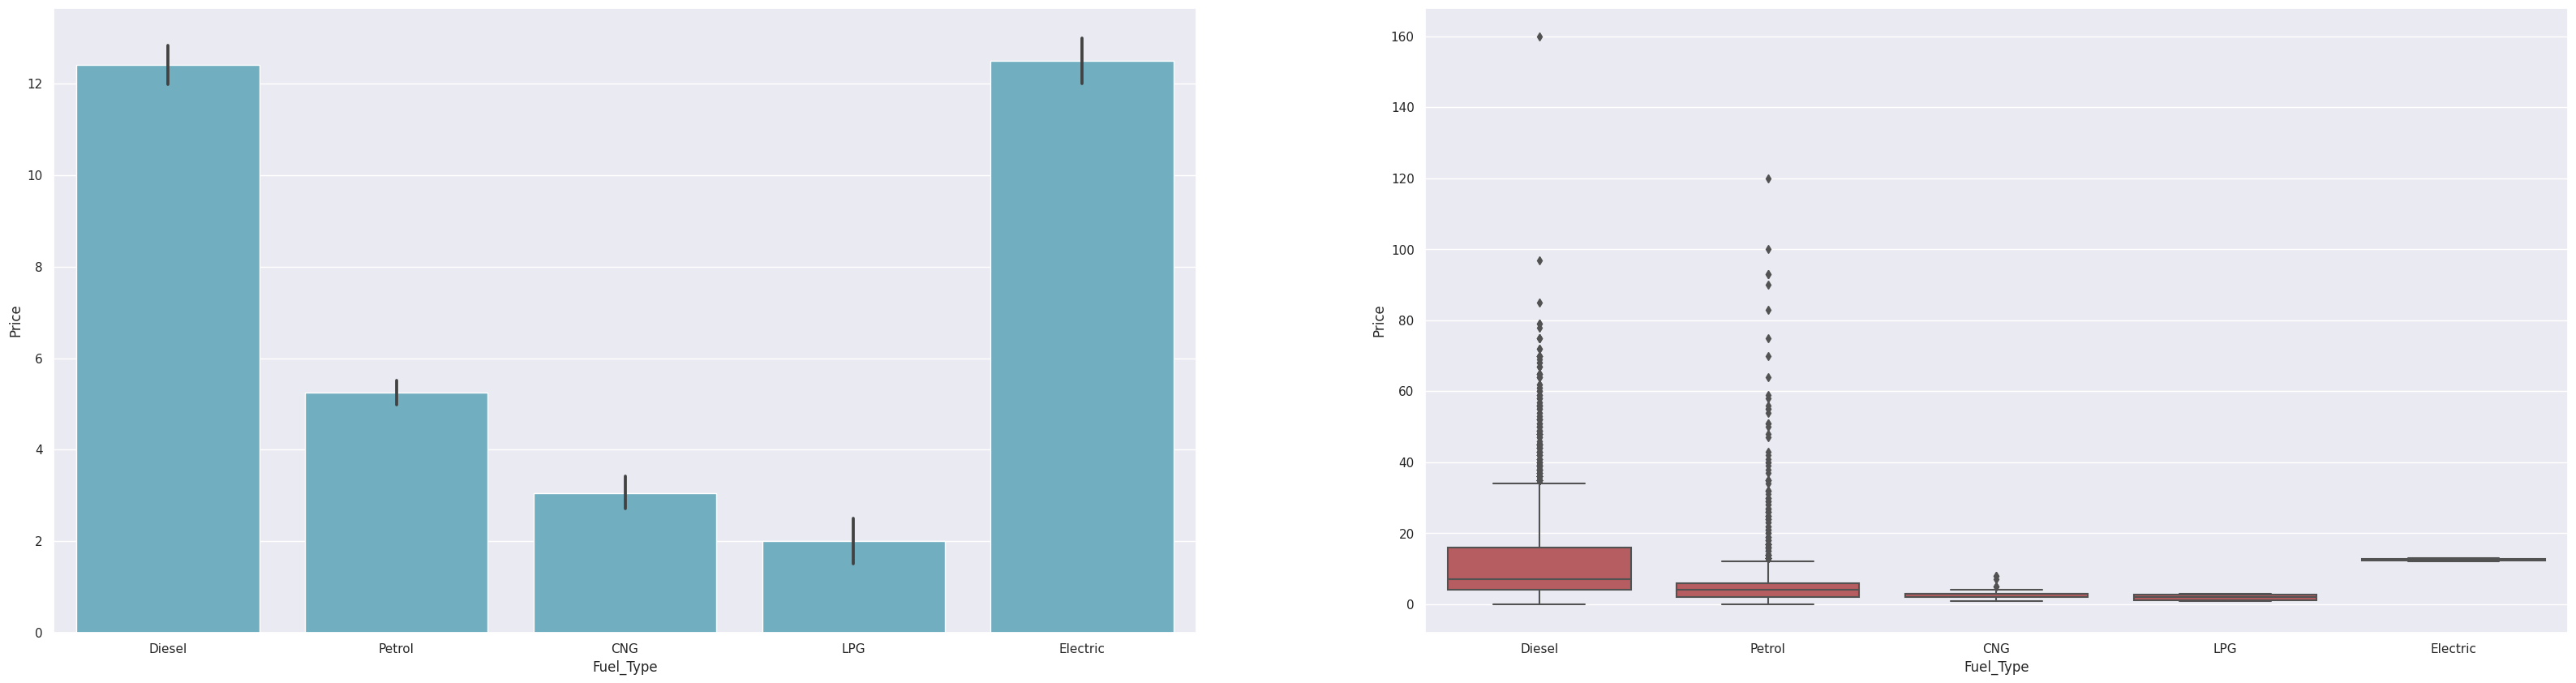

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


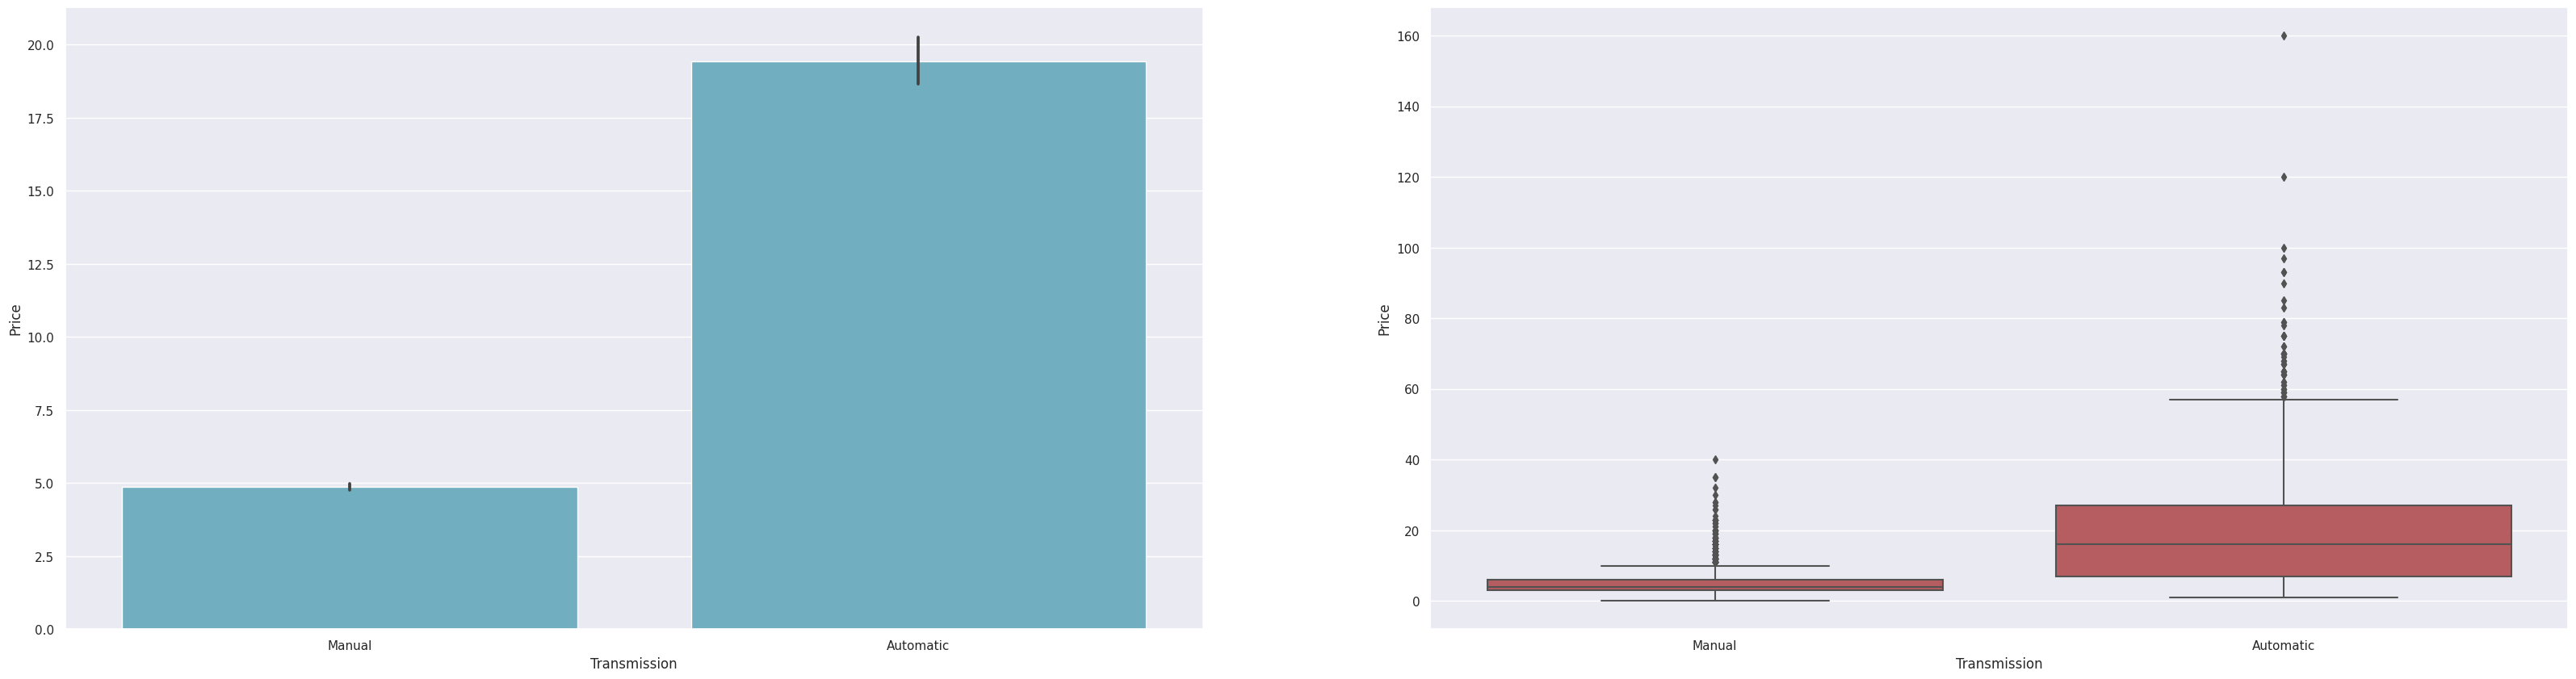

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


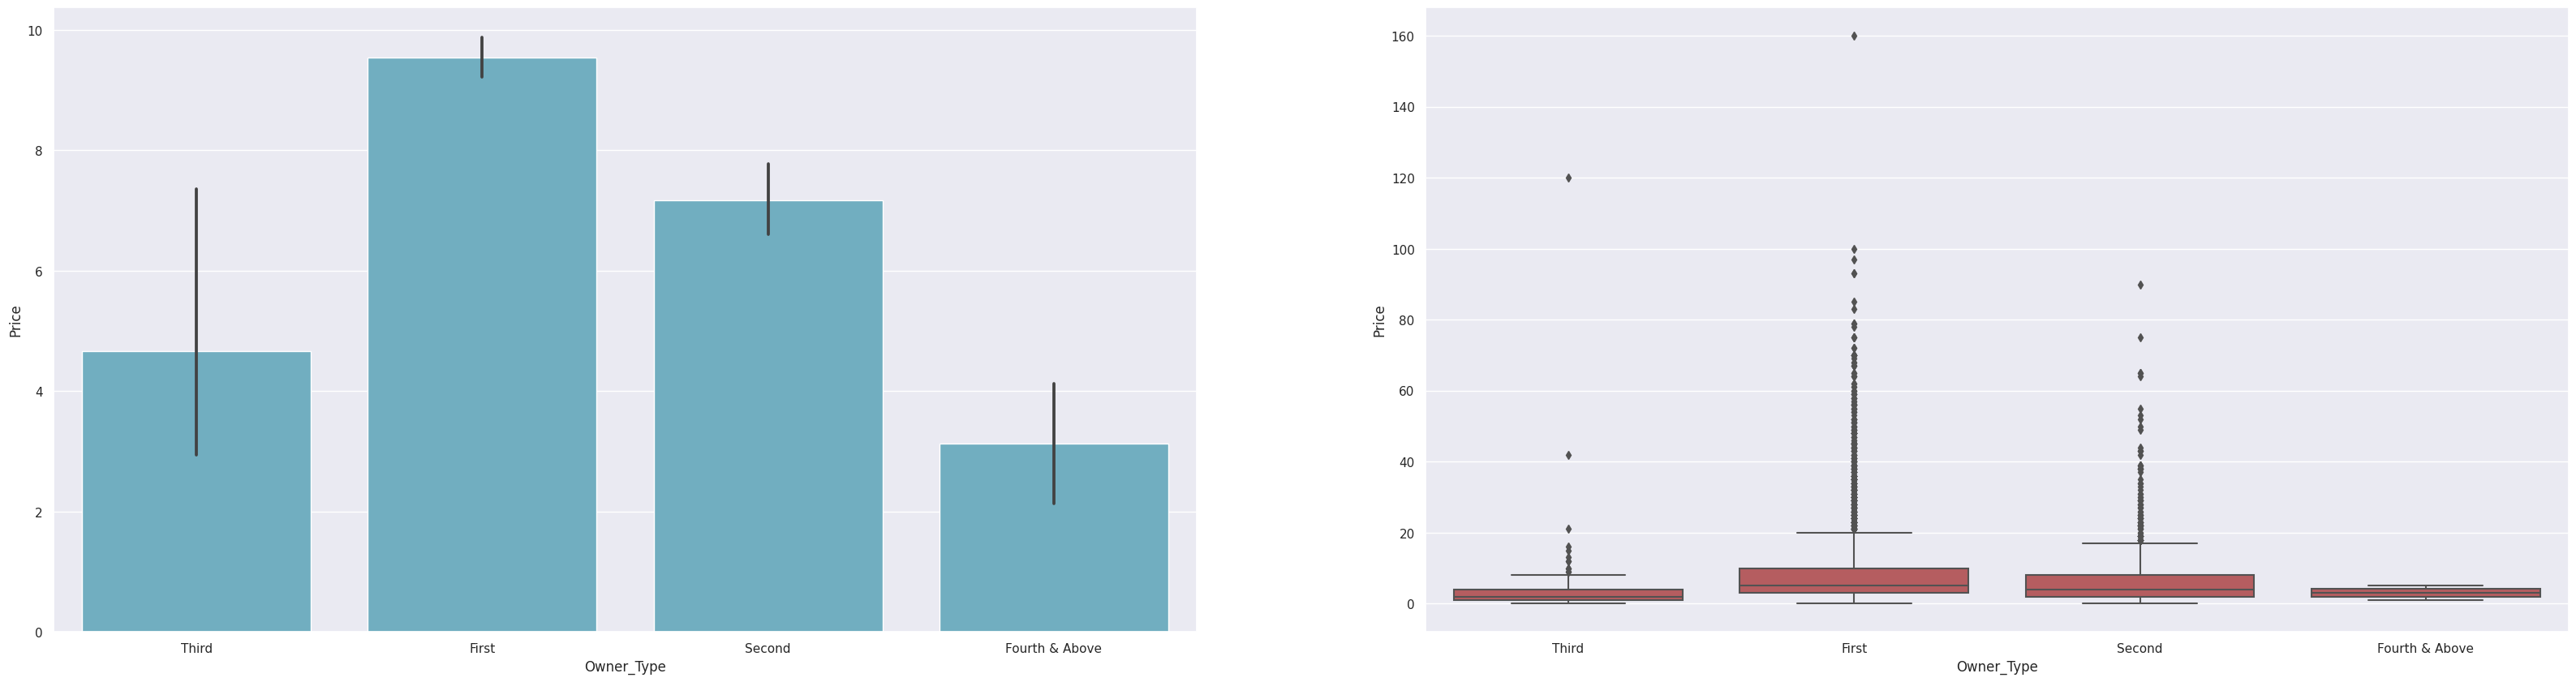

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


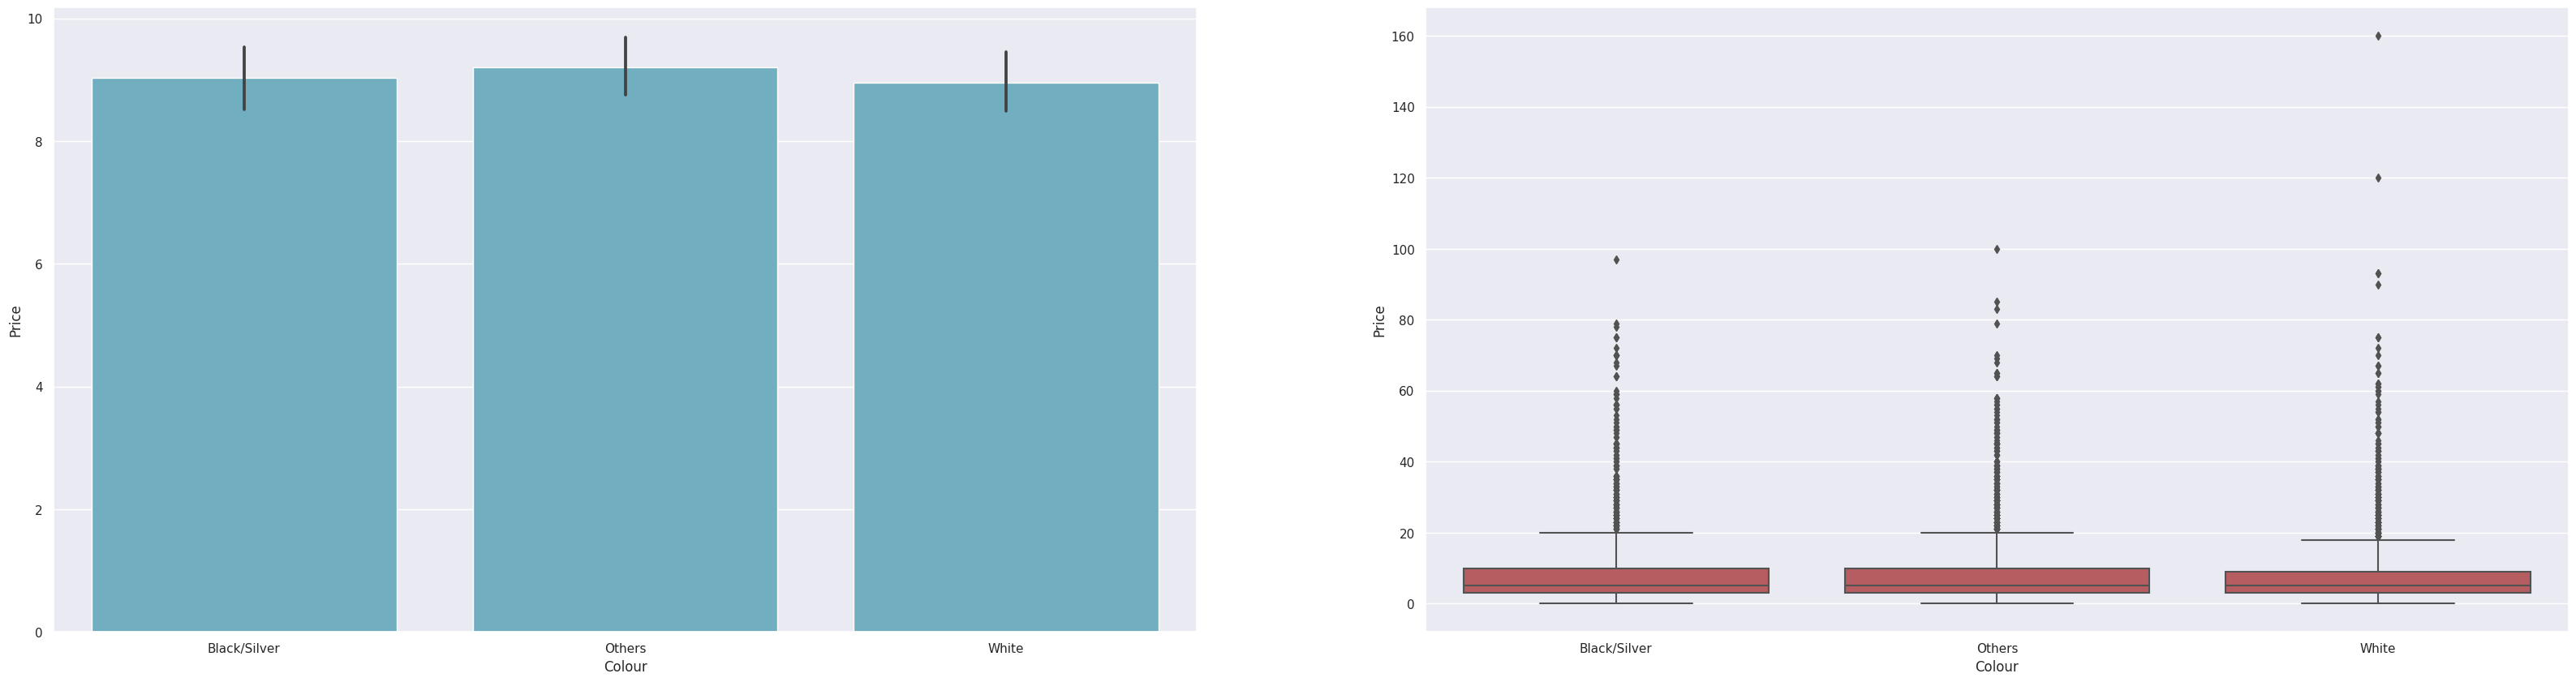

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


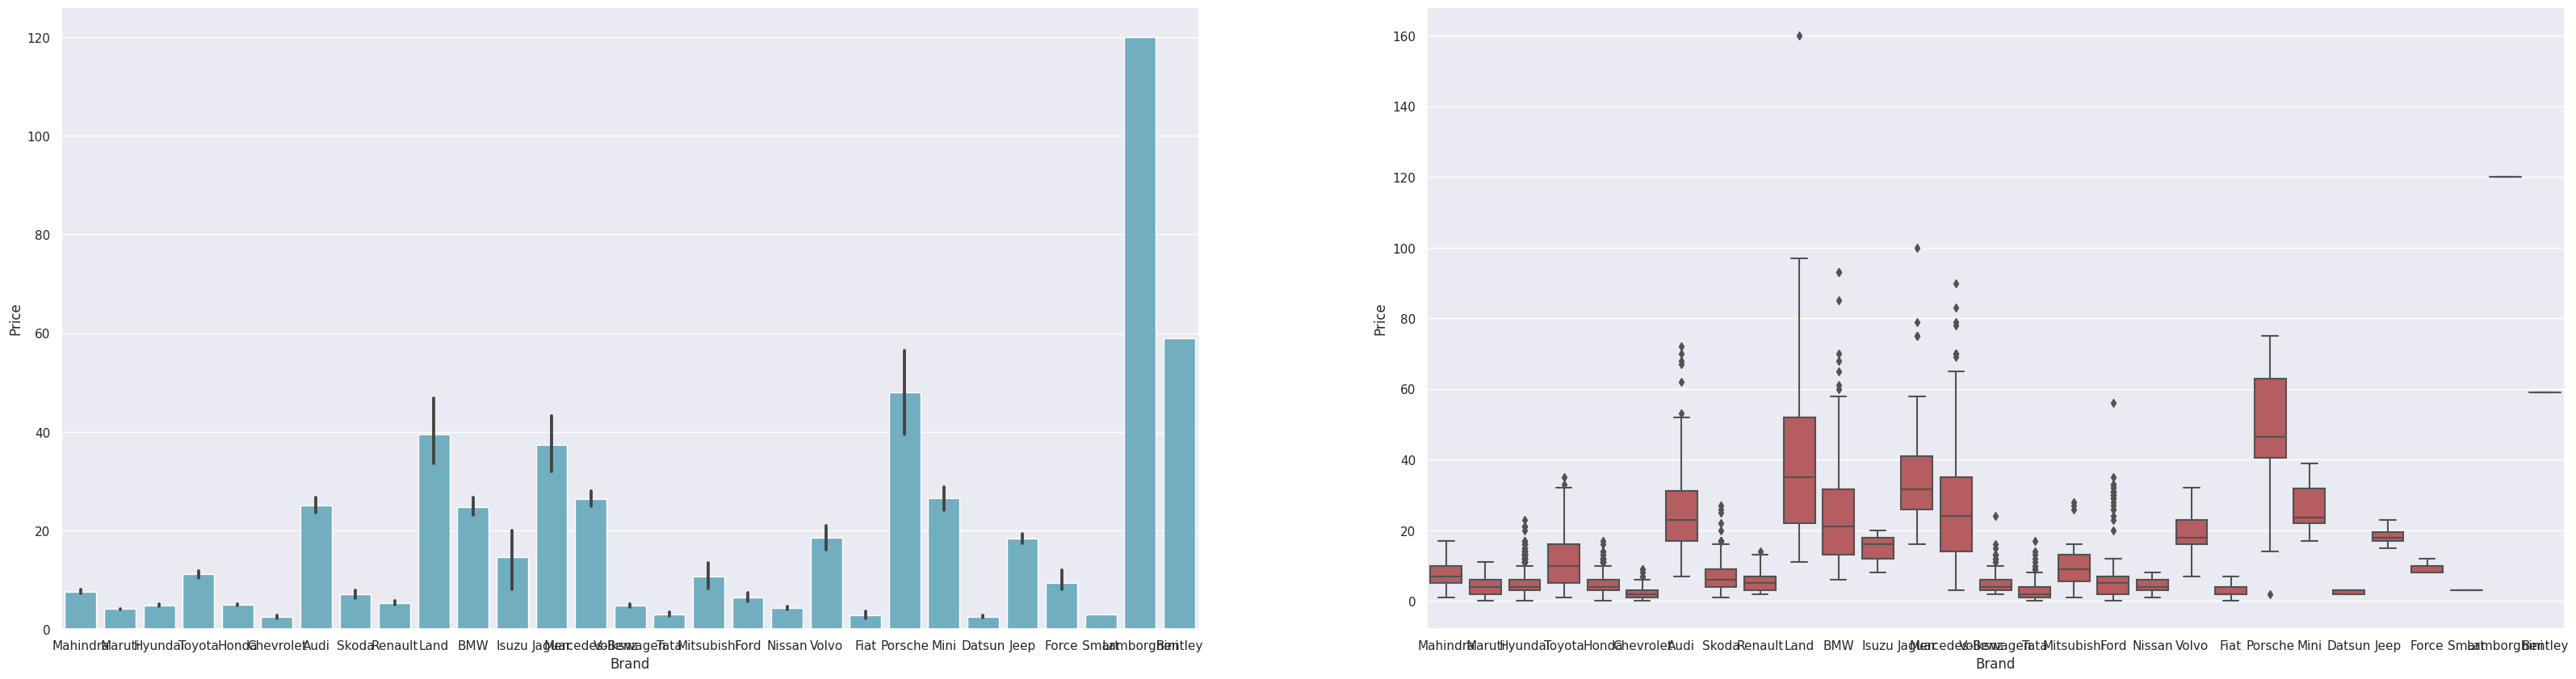

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


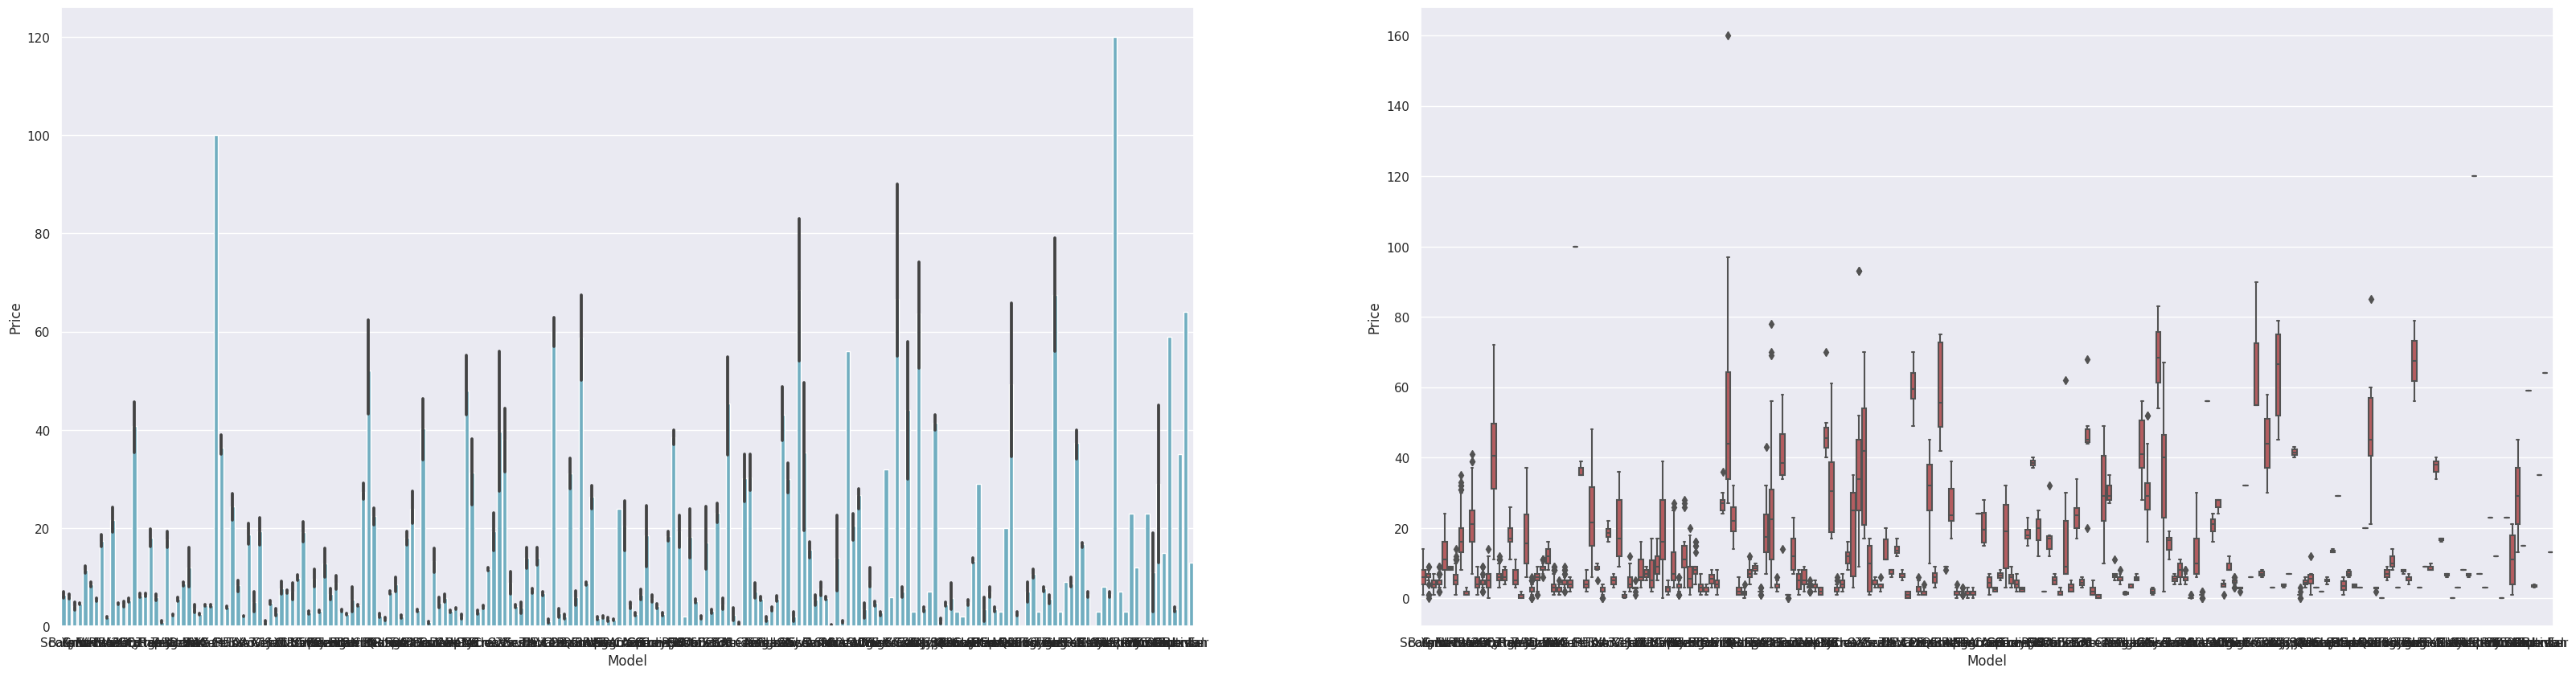

None


In [68]:
def Analysis_target(column,nbins):

    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(40,10))
    
    print(sns.barplot(x=cars[column],y=cars["Price"], color='c', ax=axs[0]))
    print(sns.boxplot(x=cars[column],y=cars["Price"],ax=axs[1],color='r'))
    
    plt.show();
    
for column in cars.columns:
    if cars[column].dtype == 'object':
        print(Analysis_target(column,30))

**Check for Outliers**

Shape before Outliers Treatment (5959, 18)


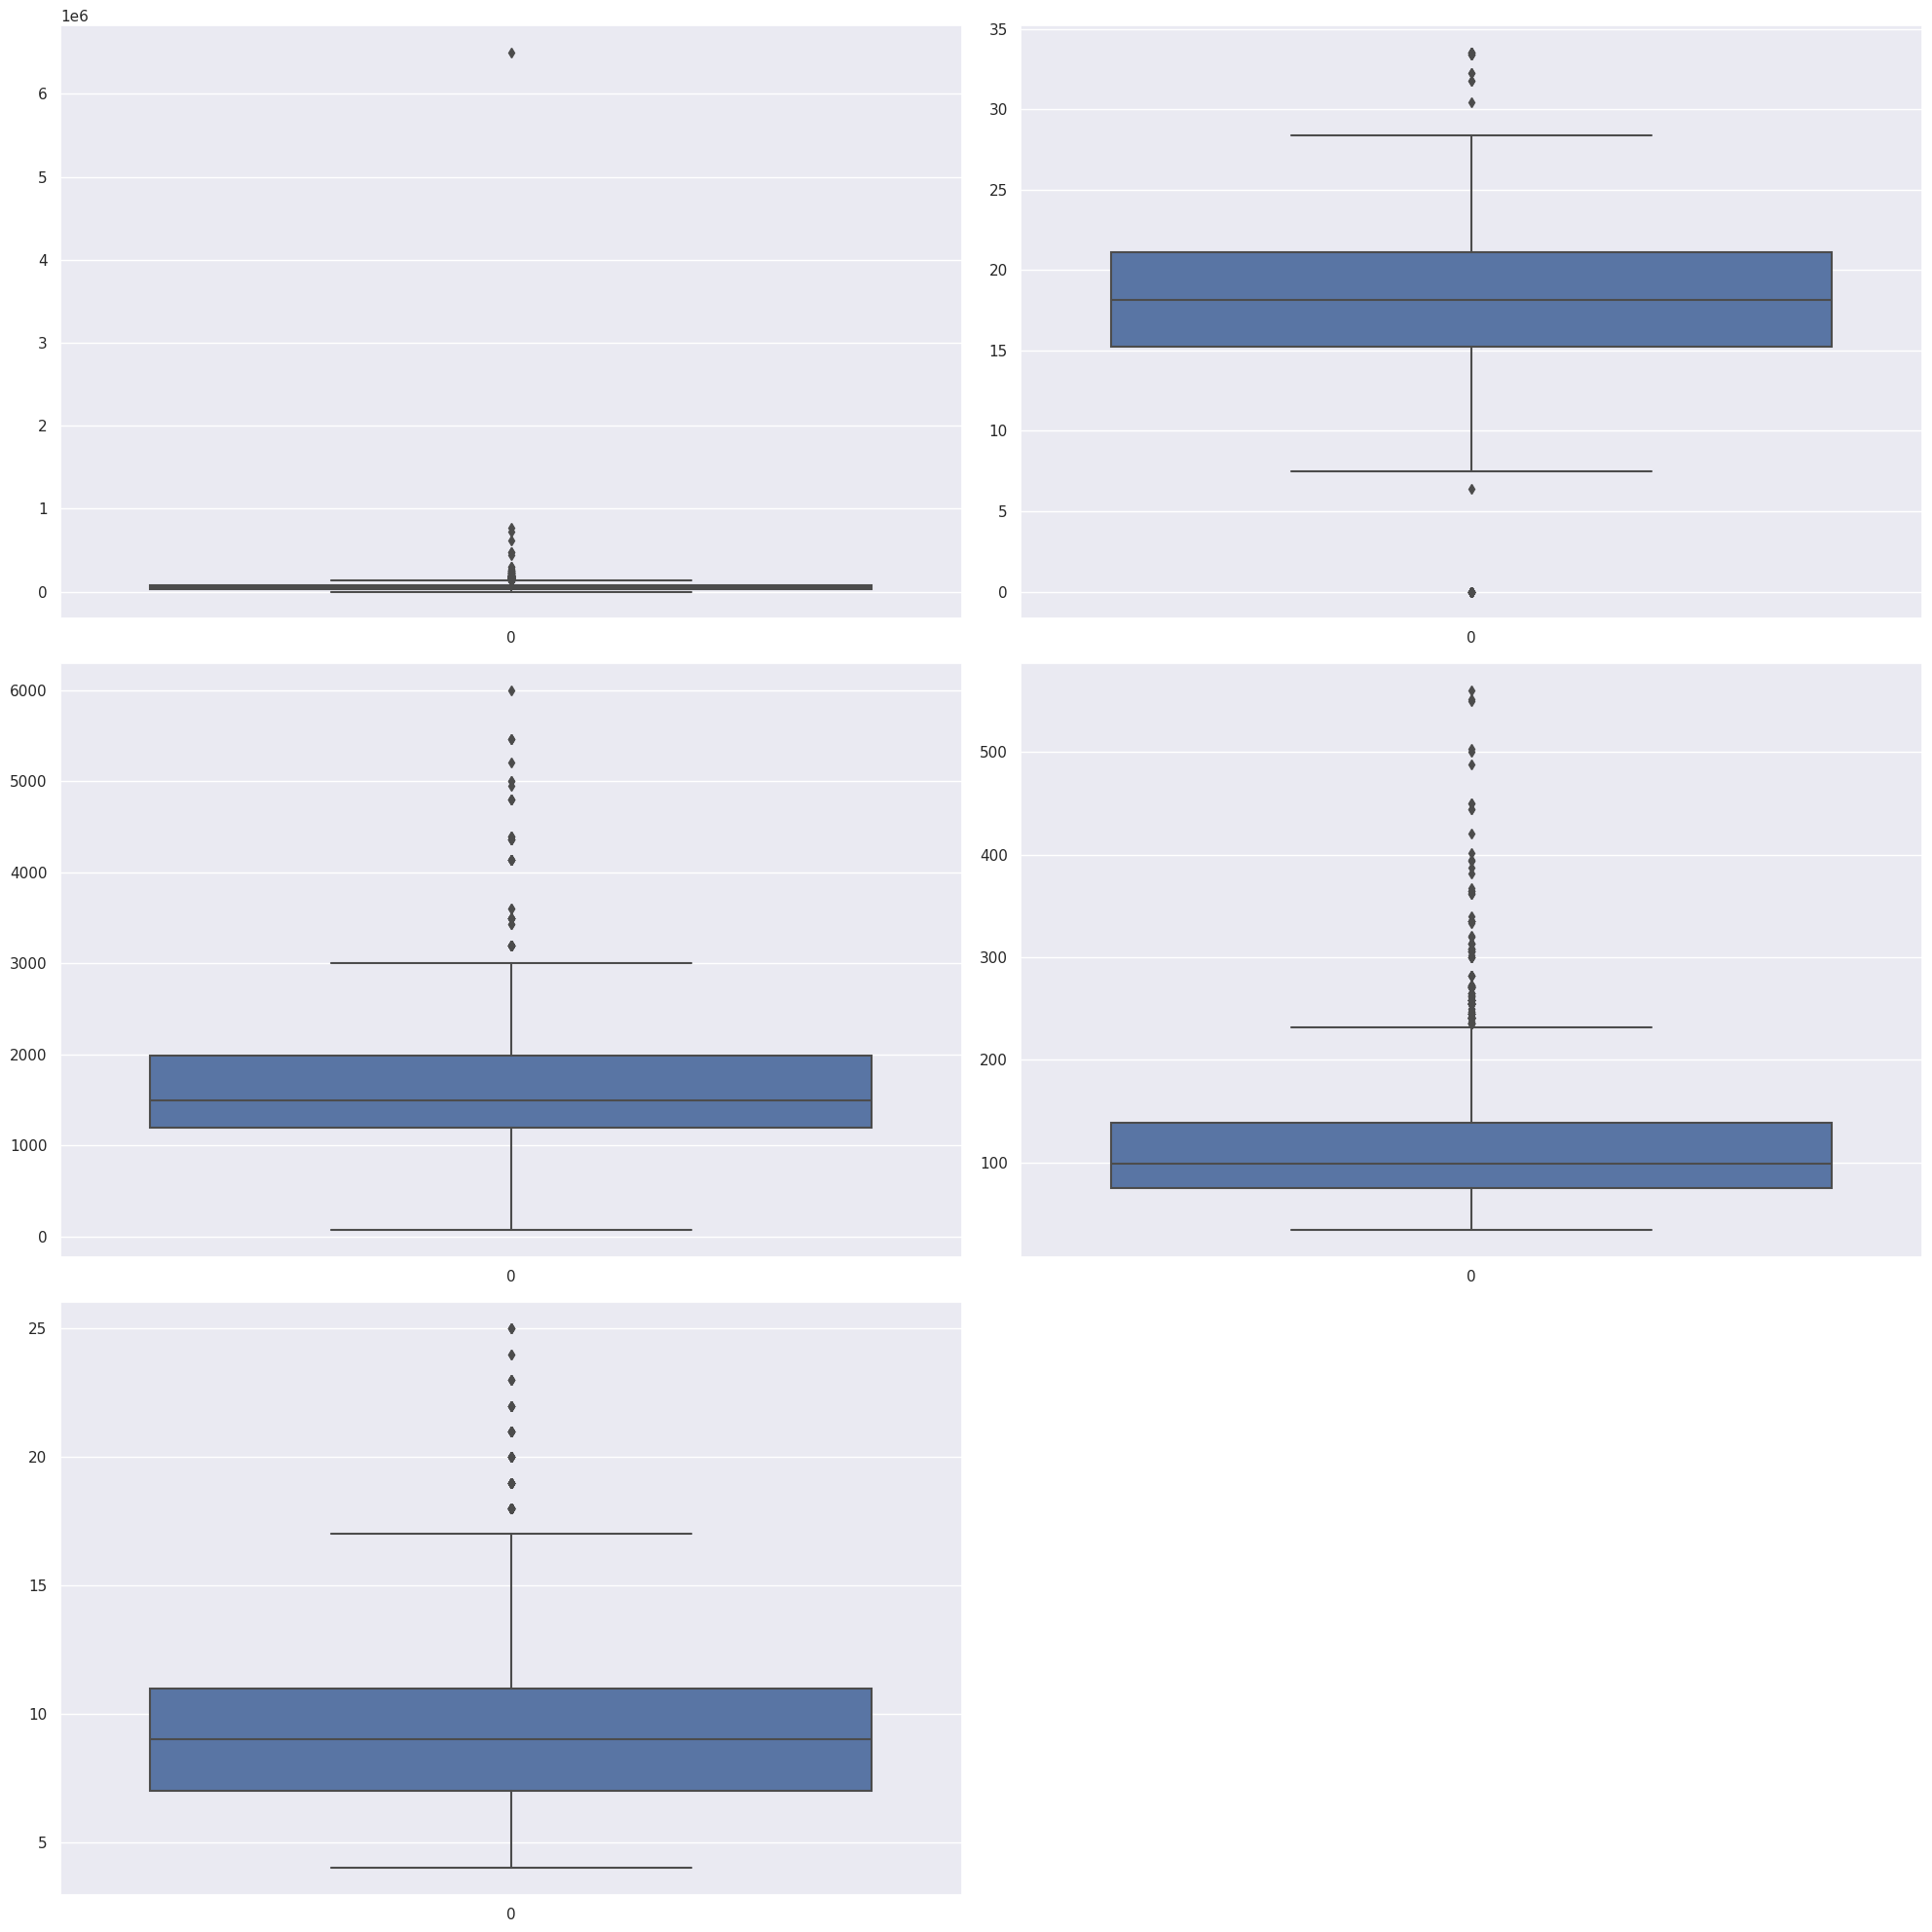

In [69]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cars.shape)

**Seems like Kilometers_Driven, Power, Engine have many outliers**

**Outliers Treatment**

In [70]:
Q1 = cars.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = cars.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [71]:
lower_range

Year                  2006.00
Kilometers_Driven   -24586.25
Mileage                  6.50
Engine                  19.00
Power                  -19.65
Seats                    5.00
No. of Doors             4.00
Price                   -7.50
CarAge                   1.00
dtype: float64

In [72]:
upper_range

Year                   2022.00
Kilometers_Driven    131551.75
Mileage                  29.86
Engine                 3163.00
Power                   232.75
Seats                     5.00
No. of Doors              4.00
Price                    20.50
CarAge                   17.00
dtype: float64

In [73]:
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']> 131603.50,131603.50,cars['Kilometers_Driven'])

cars['Mileage']=np.where(cars['Mileage']> 29.86,29.86,cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']< 6.5,6.5,cars['Mileage'])

cars['Engine']=np.where(cars['Engine']< 19.00,19.00,cars['Engine'])
cars['Engine']=np.where(cars['Engine']> 3163.00,3163.00,cars['Engine'])

cars['Power']=np.where(cars['Power']> 232.75,232.75,cars['Power'])

cars['CarAge']=np.where(cars['CarAge']> 15.25,15.25,cars['CarAge'])

Shape After Outliers Treatment (5959, 18)


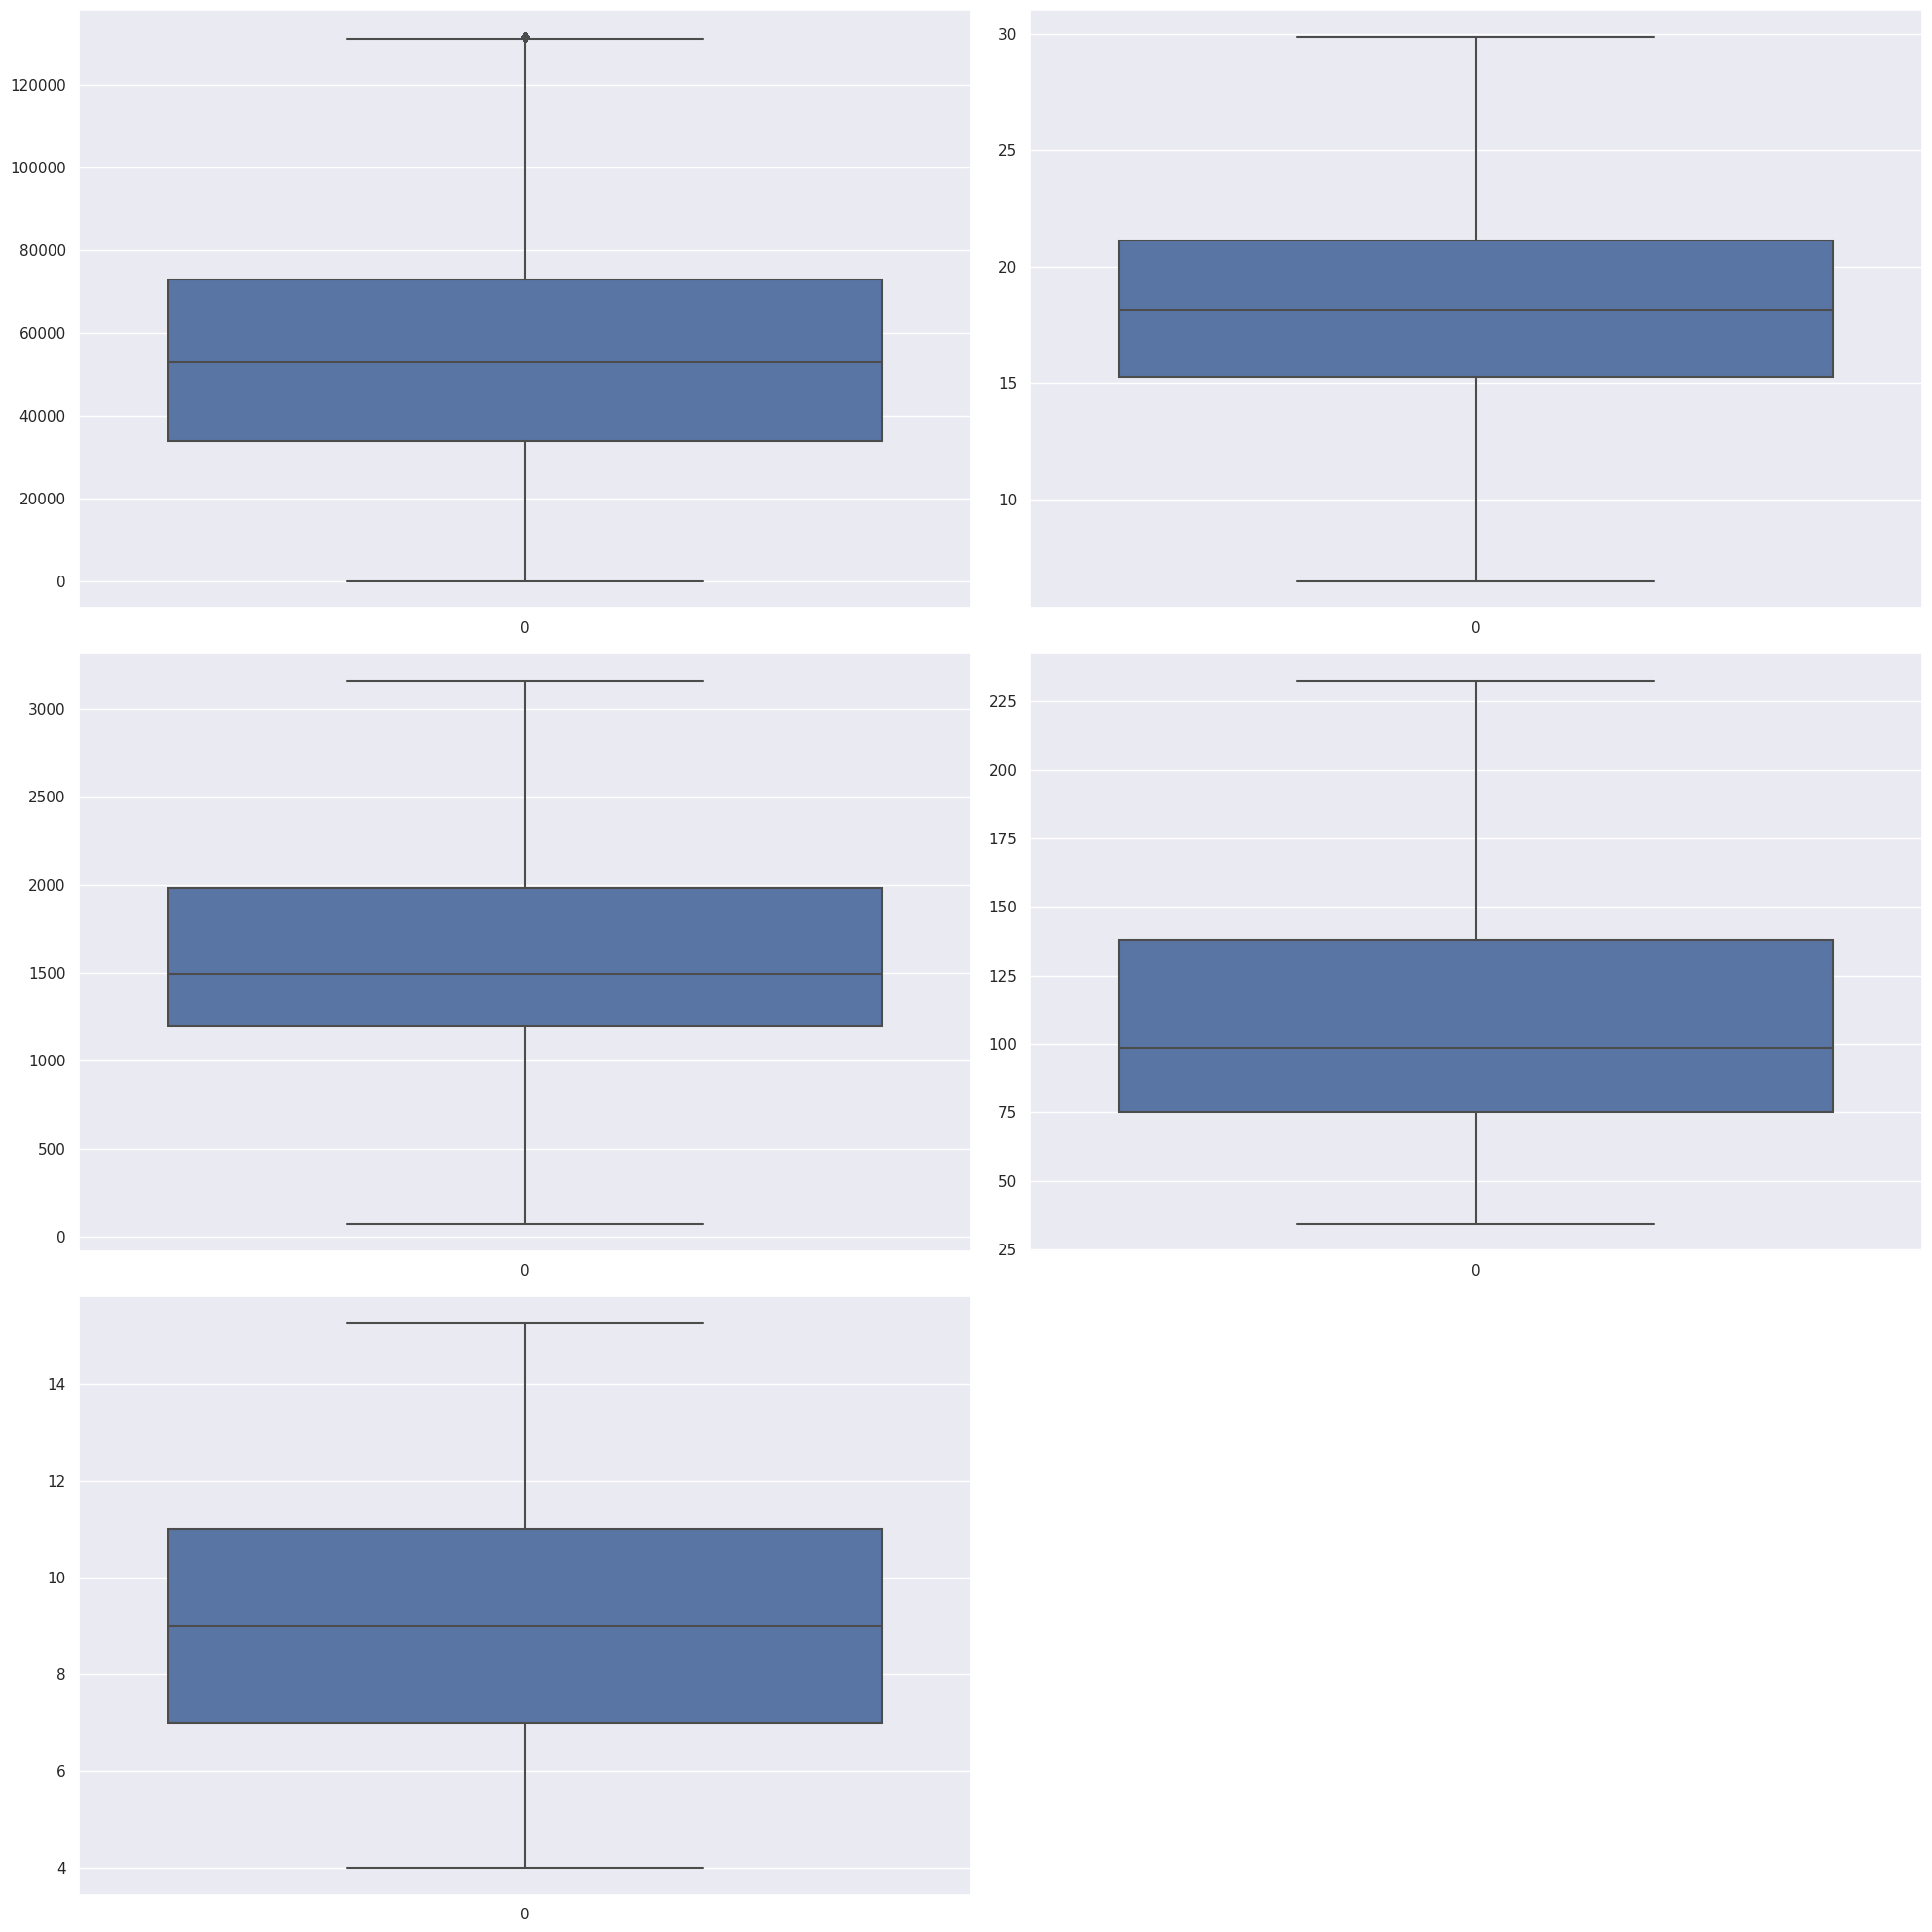

In [74]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',cars.shape)

Since this was Outliers Treatment by imputing UL and LL in place of Outliers thus, the number of rows didn't change but had it been Outliers Removal, the number of rows would have changed

**Null Values Imputation**

In [75]:
cols=cars.isnull().sum()[cars.isnull().sum()>0].index

In [76]:
cols

Index(['Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors',
       'Cars_Category', 'CarAge'],
      dtype='object')

In [77]:
objects=cars[cols].select_dtypes(include=['object','category']).columns
non_objects=cars[cols].select_dtypes(exclude=['object','category']).columns

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

**Impute the Non-Object values using Median**

In [78]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(cars[non_objects].iloc[:,:])

In [79]:
cars[non_objects]=imputer.transform(cars[non_objects])

**Impute the Object values using Mode**

In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(cars[objects].iloc[:,:])

In [81]:
cars[objects]=imputer.transform(cars[objects])

In [82]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
Brand                0
Model                0
Cars_Category        0
CarAge               0
dtype: int64

**There are no Null values now**

**Correlation Plot**

<Axes: >

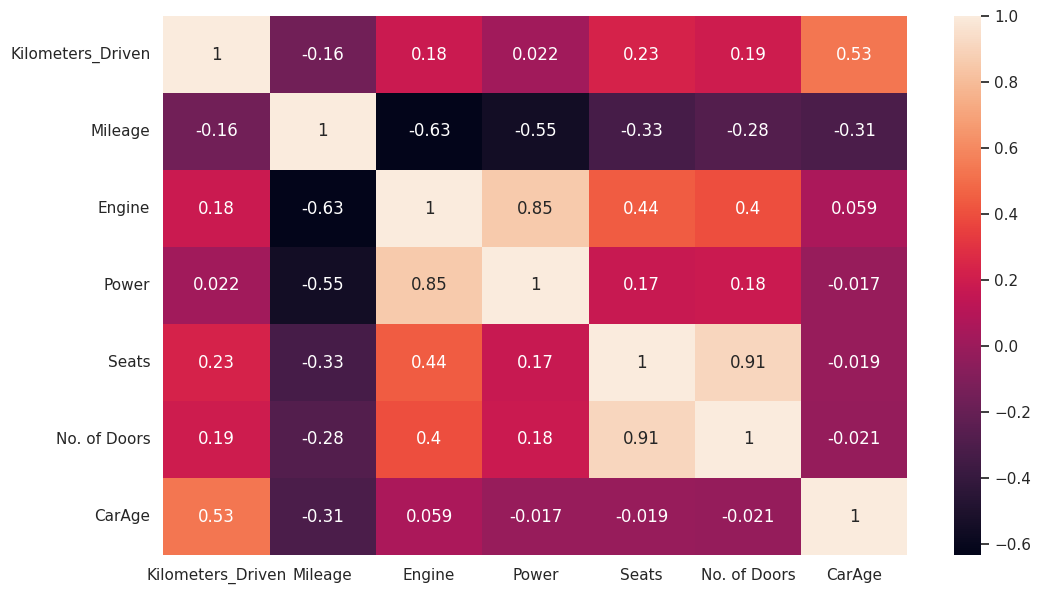

In [83]:
X=cars.drop(['Price','Name','Year'],axis=1)

plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)

- Engine & Power, Seats & No.of Doors -> highly correlated
- For algorithms that are affected by correlation in independent variables, drop one of the variables in that set (Say: Engine and No. of Doors)

**Encode the Data**

In [84]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour,Brand,Model,Cars_Category
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver,Mahindra,Scorpio,Budget_Friendly
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others,Maruti,Baleno,Budget_Friendly
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White,Mahindra,Xylo,Budget_Friendly
3,Hyundai Grand,Delhi,Diesel,Manual,First,White,Hyundai,Grand,Budget_Friendly
4,Toyota Innova,Delhi,Diesel,Manual,First,Others,Toyota,Innova,Medium_Range


There are two types of categorical data 
- Ordinal: Order based like 'good','bad','worst' or Clothing sizes
- Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

You are free to use any encoding technique as long as it works.

Also, rememeber that on Official Site of Scikit-learn's Label Encoder it is mentioned that "This transformer should be used to encode target values, i.e. y, and not the input X." 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Link</a>

In [85]:
cars.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Colour                object
Seats                float64
No. of Doors         float64
Price                  int64
Brand                 object
Model                 object
Cars_Category         object
CarAge               float64
dtype: object

In [87]:
len(cars.Model.unique())

208

**Split the Data**

In [88]:
x=cars.drop(['Price','Name','Year'],axis=1) #name is splitted in Model and Brand; Year is transformed to CarAge
y=cars.Price

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [98]:
len(x_train)

4171

In [104]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [109]:
encoder = LabelEncoder()
x_train['Location'] = encoder.fit_transform(x_train['Location'])
x_train['Fuel_Type'] = encoder.fit_transform(x_train['Fuel_Type'])
x_train['Transmission'] = encoder.fit_transform(x_train['Transmission'])
x_train['Colour'] = encoder.fit_transform(x_train['Colour'])
x_train['Brand'] = encoder.fit_transform(x_train['Brand'])
x_train['Model'] = encoder.fit_transform(x_train['Model'])
x_train['Cars_Category'] = encoder.fit_transform(x_train['Cars_Category'])
x_train['Owner_Type'] = encoder.fit_transform(x_train['Owner_Type'])

In [116]:
x_test['Location'] = encoder.fit_transform(x_test['Location'])
x_test['Fuel_Type'] = encoder.fit_transform(x_test['Fuel_Type'])
x_test['Transmission'] = encoder.fit_transform(x_test['Transmission'])
x_test['Colour'] = encoder.fit_transform(x_test['Colour'])
x_test['Brand'] = encoder.fit_transform(x_test['Brand'])
x_test['Model'] = encoder.fit_transform(x_test['Model'])
x_test['Owner_Type'] = encoder.fit_transform(x_test['Owner_Type'])
x_test['Cars_Category'] = encoder.fit_transform(x_test['Cars_Category'])

In [110]:
print(x_train)

      Location  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
4965         9            57000.0          4             0           0   
4012        10           131603.5          1             1           2   
3616         8            51000.0          1             0           0   
1290         5            26400.0          4             1           0   
2211         3            22684.0          4             1           0   
...        ...                ...        ...           ...         ...   
5218         9            56000.0          4             1           2   
4060        10            40158.0          1             1           0   
1346         1            61000.0          4             1           2   
3454         3            46173.0          1             1           2   
3582         6            46650.0          4             1           0   

      Mileage  Engine   Power  Colour  Seats  No. of Doors  Brand  Model  \
4965    16.80  1497.0  118.00      

In [117]:
x_test

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Brand,Model,Cars_Category,CarAge
5085,0,12645.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),17.00,1591.0,121.30,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),4.0
1189,0,31021.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),19.50,1968.0,141.00,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),7.0
2713,0,71000.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),25.10,1498.0,98.60,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),9.0
815,0,83678.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),22.32,1582.0,126.32,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),11.0
5152,0,60000.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),11.70,2354.0,177.60,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,0,72524.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),17.90,2143.0,136.00,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),6.0
2904,0,68347.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),18.90,998.0,67.10,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),11.0
5559,0,21000.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),14.40,1598.0,103.60,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),10.0
5227,0,55300.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),19.87,1461.0,83.80,LabelEncoder(),5.0,4.0,LabelEncoder(),LabelEncoder(),LabelEncoder(),9.0


In [114]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

TypeError: ignored

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [63]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

ValueError: ignored

**Looks Like ANN, DT, and RF are over-fitting, Let's Grid Search to get the best parameters**

**We can also visualise the tree and see where to prune it and decide the max_depth and other parameters**


**Grid Search on Decision Tree**

In [ ]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


ValueError: ignored

Let us take Max_depth as 10, min_samples_leaf as 15 and Min_sample_split as 15. You are welcome to try other values as well.

**Using Grid Search for Random Forest**

In [ ]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
#best_params_rfr={'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}

**Using Grid Search for ANN**

In [ ]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(x_train_scaled,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
#best_params_annr={'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}

In [ ]:
annr= MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

In [ ]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(x_train.columns,rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Note :
    
<b/>So from the above we are clearly able to see 'CarAge' is the most important feature and it has a most effect over the price of the car , whereas 'Location' is the least important feature and thus has the least effect on price of the car.</b>

top 5 most important features are : <b/>['CarAge','Cars_Category','Model','Brand','No.of Doors']</b>

### New Data Prediction

In [ ]:
x_train.iloc[0]

In [ ]:
x_train.iloc[0].shape

In [ ]:
model=rfr

In [ ]:
input_val = [9,5700,4,0,0,16,1497,118,1,5,4,8,44,0,11]
final_features = [np.array(input_val)]
dataframe = pd.DataFrame(final_features)

output = model.predict(dataframe )
result = "%.2f" % round(output[0], 2)
result

In [ ]:
y_train.iloc[0]

In [ ]:
y_train.iloc[0]

In [ ]:
x_test.iloc[0]

In [ ]:
input_val = [7,12645,4,0,0,17,1591,121.3,2,5,4,9,181,0,3]
final_features = [np.array(input_val)]
dataframe2 = pd.DataFrame(final_features)

output = model.predict(dataframe2 )
result = "%.2f" % round(output[0], 2)
result

In [ ]:
y_test.iloc[0]

## Create a Pickle File

In [ ]:
import pickle

In [ ]:
pickle.dump(rfr,open('rfrmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('rfrmodel.pkl','rb'))

In [ ]:
#lets check if pickled model is predicting 
pickled_model.predict(dataframe2)

In [ ]:
result2=pickled_model.score(x_test,y_test)
print(np.round(result2*100,2))